In [1]:
import pandas as pd, matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import seaborn as sns
import datetime as dt
%matplotlib inline

In [2]:
drinking_file = "Resources/drinkingwater.csv"
sani_file = "Resources/sanitization.csv"
life_file = "Resources/lifeexpectancy.csv"
hale_file = "Resources/halelife.csv"

In [3]:
drinking_data = pd.read_csv(drinking_file)
sani_data = pd.read_csv(sani_file)
life_data = pd.read_csv(life_file)
hale_data = pd.read_csv(hale_file)

In [4]:
# Merge Life Expectancy and HALE Healthy life expectancy Data

life_results = pd.merge(life_data, hale_data, how="inner", on=["Location","Period","Sex"])

# rename two column names to have shorter names by using:
    #"data.rename()" and a dictionary inside the ()
life_results = life_results.rename(columns = {"Life expectancy at birth (years)": "Life_(years)", "Healthy life expectancy (HALE) at birth (years)":"HALE_(years)"})
life_results.head()

,Location,Period,Sex,Life_(years),HALE_(years)
0,Afghanistan,2019,Both sexes,63.21,53.95
1,Afghanistan,2019,Male,63.29,54.73
2,Afghanistan,2019,Female,63.16,53.15
3,Afghanistan,2015,Both sexes,61.65,52.60
4,Afghanistan,2015,Male,61.04,52.78


In [5]:
# Edit the names inside a column to shorter names by using: 
    #"data[column name].replace()" and a dictionary inside the ()
life_results["Location"] = life_results["Location"].replace({"United Kingdom of Great Britain and Northern Ireland": "United Kingdom", "United States of America": "United States"})

In [6]:
# Filter out the countries we want:

# put interested countries in a dataframe
    # "data.query()" evaluates the data and pull out data of interest
# filtered_countries_df = pd.DataFrame(life_results.query('Location == ["Switzerland","Canada", "Japan", "Germany", "Australia", "United States", "United Kingdom", "Liberia", "Nigeria", "Madagascar"]'))
    # "pd.DataFrame" not necessary, because life_results is already a dataframe
filtered_countries_df = life_results.query('Location == ["Switzerland","Canada", "Japan", "Germany", "Australia", "United States", "United Kingdom", "Liberia", "Nigeria", "Madagascar"]')

# extra the countries out of the dataframe
    # "unique()" gives out country names w/o repeating the country names
countries = filtered_countries_df["Location"].unique()
countries


array(['Australia', 'Canada', 'Germany', 'Japan', 'Liberia', 'Madagascar',
       'Nigeria', 'Switzerland', 'United Kingdom', 'United States'],
      dtype=object)

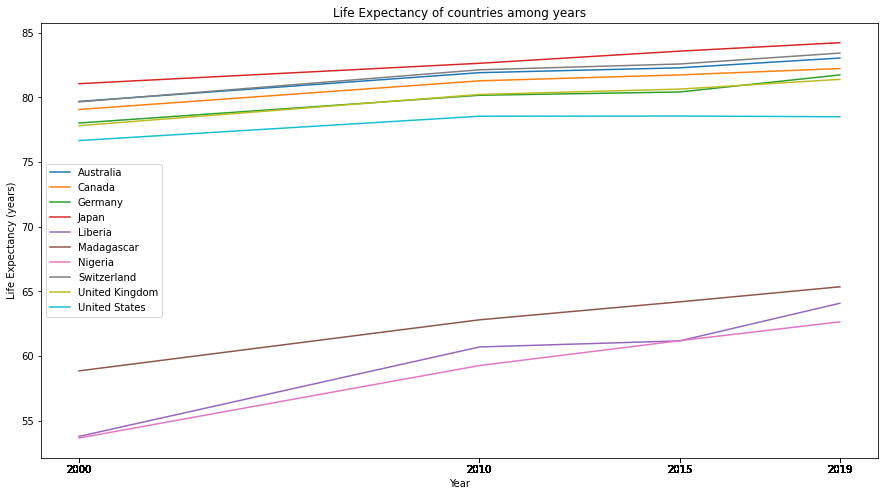

In [7]:
#  Life Expectancy of countries among years 

# set graph size
plt.figure(figsize = (15, 8))

# use for loop to plot all the countries into a line chart
    # w/o for loop, the graph will only have line for one country
for country in countries:
    df = filtered_countries_df[filtered_countries_df["Location"]==country][["Location","Period","Life_(years)"]].groupby("Period").mean()
 
    plt.plot(df.index, df["Life_(years)"], label = country)

plt.xticks(ticks=filtered_countries_df.Period.values)
plt.xlabel("Year")
plt.ylabel("Life Expectancy (years)")
plt.title("Life Expectancy of countries among years")
plt.legend()    
plt.savefig("My Project Images/ Life Expectancy among years.png",bbox_inches ="tight")
    # "Bbox_inches"： 
        # Only the given portion of the figure is saved. 
        # If 'tight', try to figure out the tight bbox of the figure. 
        # If None, use savefig.bbox

plt.show()

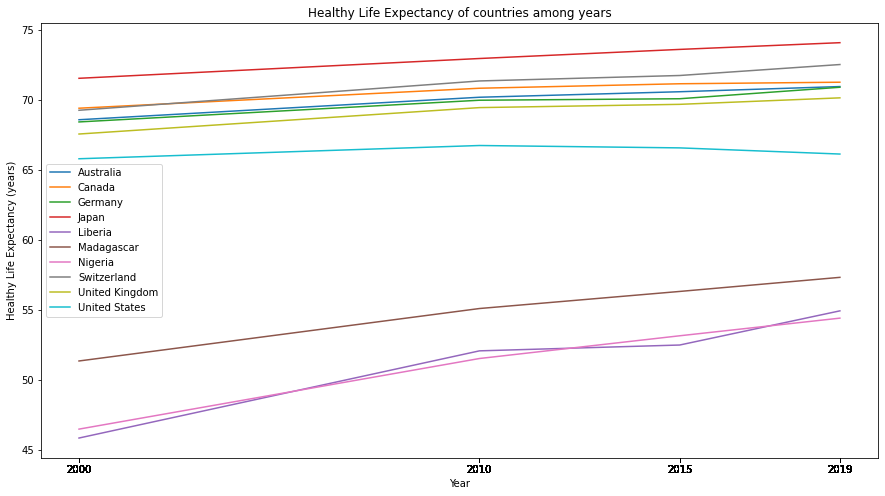

In [8]:
# Healthy HALE Life Expectancy of countries among years

plt.figure(figsize = (15, 8))

for country in countries:
    df = filtered_countries_df[filtered_countries_df["Location"]==country][["Location","Period","HALE_(years)"]].groupby("Period").mean()
 
    plt.plot(df.index, df["HALE_(years)"], label = country)

plt.xticks(ticks=filtered_countries_df.Period.values) 
plt.xlabel("Year")
plt.ylabel("Healthy Life Expectancy (years)")
plt.title("Healthy Life Expectancy of countries among years")
plt.legend()    
plt.savefig("My Project Images/ Healthy Life Expectancy among years.png",bbox_inches ="tight")
plt.show()

In [9]:
# Set the Data Frame in years

life_2000 = filtered_countries_df.query("Period == '2000'")
life_2010 = filtered_countries_df.query("Period == '2010'")
life_2015 = filtered_countries_df.query("Period == '2015'")
life_00and10 = filtered_countries_df.query("Period == 2000 | Period == 2010")
    # query("Period == 2000 | Period == 2010"): 
        # data only has to satisfy one of them

years = [life_2000, life_2010, life_2015]

,Period,Life_(years),HALE_(years)
Location,,,
United States,2000,76.660000,65.780000
United Kingdom,2000,77.810000,67.546667
Switzerland,2000,79.653333,69.243333
Nigeria,2000,53.653333,46.470000
Madagascar,2000,58.846667,51.336667
Liberia,2000,53.776667,45.833333
Japan,2000,81.060000,71.526667
Germany,2000,78.016667,68.410000
Canada,2000,79.063333,69.390000


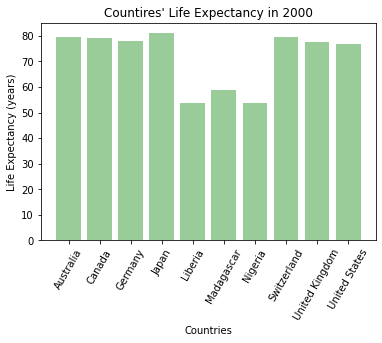

,Period,Life_(years),HALE_(years)
Location,,,
United States,2010,78.543333,66.726667
United Kingdom,2010,80.226667,69.433333
Switzerland,2010,82.133333,71.336667
Nigeria,2010,59.260000,51.513333
Madagascar,2010,62.796667,55.083333
Liberia,2010,60.696667,52.060000
Japan,2010,82.636667,72.940000
Germany,2010,80.163333,69.960000
Canada,2010,81.280000,70.816667


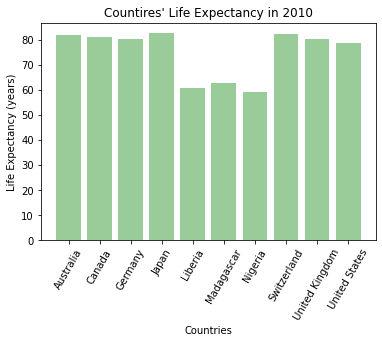

,Period,Life_(years),HALE_(years)
Location,,,
United States,2015,78.556667,66.556667
United Kingdom,2015,80.640000,69.666667
Switzerland,2015,82.583333,71.726667
Nigeria,2015,61.183333,53.136667
Madagascar,2015,64.186667,56.303333
Liberia,2015,61.166667,52.476667
Japan,2015,83.576667,73.590000
Germany,2015,80.416667,70.066667
Canada,2015,81.740000,71.136667


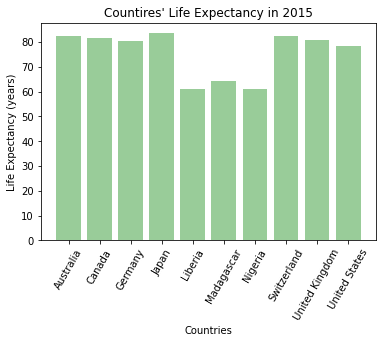

In [10]:
# Group by mean for life expectancy for each country and make a bar chart for it in a loop
numYears = ['2000', '2010', '2015']

for index, year  in enumerate(years):
    life_summary = year.groupby("Location").mean()
    display(life_summary.sort_values(["Location"], ascending = False))
    plt.bar(life_summary.index,life_summary["Life_(years)"],color = "green", alpha = 0.4)
    plt.xticks(rotation = 60)
    plt.title("Countires' Life Expectancy in " + numYears[index])
    plt.xlabel("Countries")
    plt.ylabel("Life Expectancy (years)")
    # enumerate() gets you a counter and the value from the iterable at the same time 
        # Here it gives you back two loop variables: index and year
        # For more info refer to https://realpython.com/python-enumerate/
    
    plt.savefig("My Project Images/ Countries Life Expectancy in " + numYears[index] + ".png", bbox_inches ="tight")
     # use "+" is a good way to save multiple images at the same time.
        
    plt.show()


,Period,Life_(years),HALE_(years)
Location,,,
United States,2000,76.660000,65.780000
United Kingdom,2000,77.810000,67.546667
Switzerland,2000,79.653333,69.243333
Nigeria,2000,53.653333,46.470000
Madagascar,2000,58.846667,51.336667
Liberia,2000,53.776667,45.833333
Japan,2000,81.060000,71.526667
Germany,2000,78.016667,68.410000
Canada,2000,79.063333,69.390000


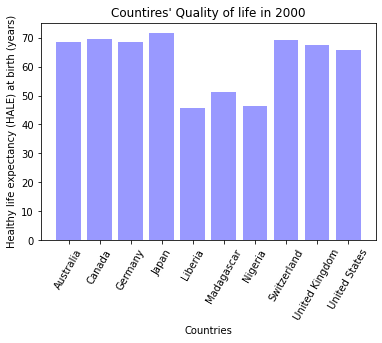

,Period,Life_(years),HALE_(years)
Location,,,
United States,2010,78.543333,66.726667
United Kingdom,2010,80.226667,69.433333
Switzerland,2010,82.133333,71.336667
Nigeria,2010,59.260000,51.513333
Madagascar,2010,62.796667,55.083333
Liberia,2010,60.696667,52.060000
Japan,2010,82.636667,72.940000
Germany,2010,80.163333,69.960000
Canada,2010,81.280000,70.816667


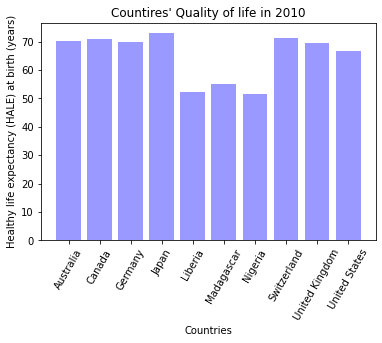

,Period,Life_(years),HALE_(years)
Location,,,
United States,2015,78.556667,66.556667
United Kingdom,2015,80.640000,69.666667
Switzerland,2015,82.583333,71.726667
Nigeria,2015,61.183333,53.136667
Madagascar,2015,64.186667,56.303333
Liberia,2015,61.166667,52.476667
Japan,2015,83.576667,73.590000
Germany,2015,80.416667,70.066667
Canada,2015,81.740000,71.136667


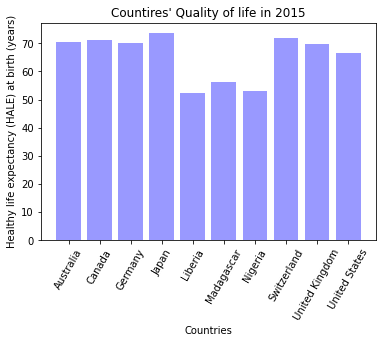

In [11]:
# Group by mean for Healthy life expectancy for each country and make a bar chart for it in a loop

numYears = ['2000', '2010', '2015']

for index, year  in enumerate(years): 
    life_summary = year.groupby("Location").mean()
    display(life_summary.sort_values(["Location"], ascending = False))
    plt.bar(life_summary.index,life_summary["HALE_(years)"], color = "blue", alpha = 0.4)
    plt.xticks(rotation = 60)
    plt.title("Countires' Quality of life in " + numYears[index])
    plt.xlabel("Countries")
    plt.ylabel("Healthy life expectancy (HALE) at birth (years)")
    
    plt.savefig("My Project Images/ Countries Life Expectancy in " + numYears[index] + ".png", bbox_inches ="tight")
    
    plt.show()

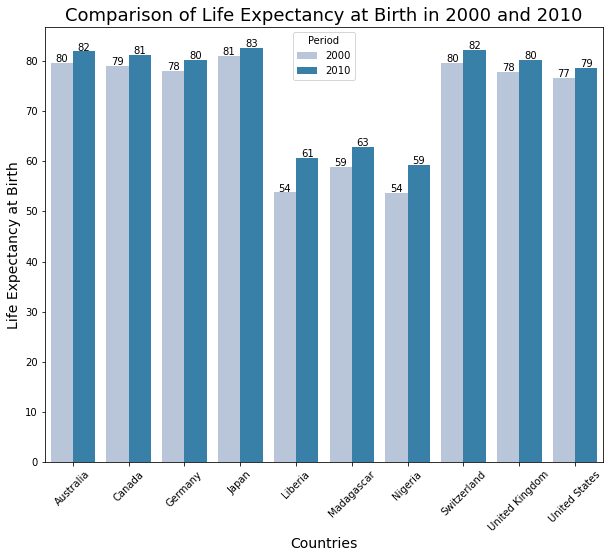

In [12]:
# Bar graph for Life Expectancy among Countries in 2000 VS 2010
plt.figure(figsize=(10, 8))

# use seaborn (a Python data visualization library) to create a barplot
graph = sns.barplot(x= "Location", 
    y="Life_(years)",
    hue = "Period", # the hue parameter determines which column in the data frame should be used for colour encoding
    data = life_00and10,
    ci=None, # confidence interval
    palette = ("PuBu")) # “palette" a Matplotlib color map. Color palettes in Seaborn: https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/

plt.ylabel("Life Expectancy at Birth", size=14)
plt.xlabel("Countries", size=14)
plt.xticks(rotation = 45)
plt.title("Comparison of Life Expectancy at Birth in 2000 and 2010", size=18)

# show values on each bar in graph
for value in graph.patches:
 height = value.get_height() # get the height of each bar

 # add value to each bar
 graph.text(x = value.get_x()+(value.get_width()/2), # x label position, “/2” added to make it in the middle of the bar
 y = height+0.2, # y lable position, added 0.2 above bar
 s = '{:.0f}'.format(height), # data values (bar heights) formatted to ignore decimals
 ha = 'center') # sets horizontal alignment (ha) to center

plt.savefig("My Project Images/ 2000 and 2010 Life Expectancy among countries.png", bbox_inches ="tight")

plt.show()

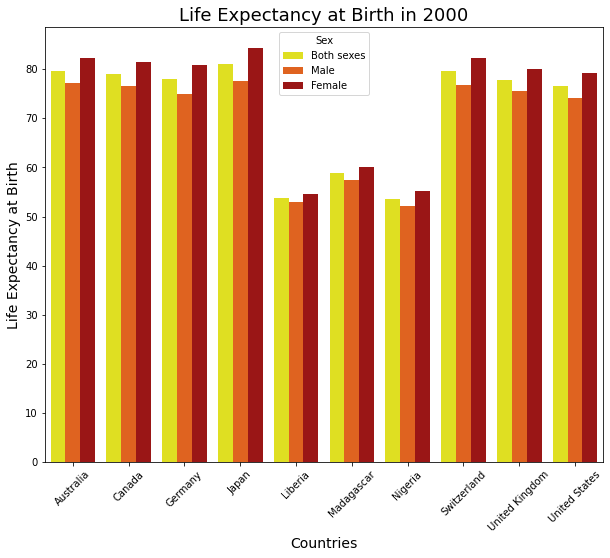

In [13]:
# Bar graph for gender and Life Expectancy among Countries in 2000
plt.figure(figsize=(10, 8))
sns.barplot(x="Location", 
    y="Life_(years)",
    hue = "Sex",
    data = life_2000,
    ci=None,
    palette = ("hot_r")) 

plt.ylabel("Life Expectancy at Birth", size=14)
plt.xlabel("Countries", size=14)
plt.xticks(rotation = 45)
plt.title("Life Expectancy at Birth in 2000", size=18)
plt.savefig("My Project Images/ 2000 Life Expectancy among gender.png",bbox_inches ="tight")

plt.show()


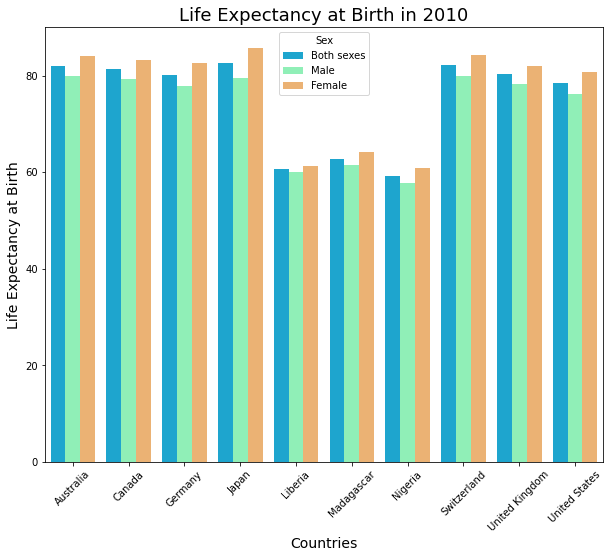

In [14]:
# Bar graph for gender and Life Expectancy among Countries in 2010
plt.figure(figsize=(10, 8))
sns.barplot(x="Location", 
    y="Life_(years)",
    hue = "Sex",
    data = life_2010,
    ci=None,
    palette = ("rainbow"))

plt.ylabel("Life Expectancy at Birth", size=14)
plt.xlabel("Countries", size=14)
plt.xticks(rotation = 45)
plt.title("Life Expectancy at Birth in 2010", size=18)
plt.savefig("My Project Images/ 2010 Life Expectancy among gender.png",bbox_inches ="tight")

plt.show()

In [15]:
# rename column name "Population using at least basic drinking-water services (%)" to "Percentage" for drinking water data
drinking_df= drinking_data.rename(columns={"Population using at least basic drinking-water services (%)":"Percentage"})
# sort dataframe by country for drinking water 
drinking_df.sort_values(['Location'], ascending=True).head()

,Location,Period,Percentage
0,Afghanistan,2017,57.32
17,Afghanistan,2000,21.62
16,Afghanistan,2001,21.62
15,Afghanistan,2002,23.60
14,Afghanistan,2003,25.58


In [16]:
# Edit the country names to shorter names
drinking_df["Location"] = drinking_df["Location"].replace({"United Kingdom of Great Britain and Northern Ireland": "United Kingdom", "United States of America": "United States"})

In [17]:
# set countries of interest to variable target_countries
target_countries_df = pd.DataFrame(drinking_df.query("Location == ['Switzerland', 'Canada', 'Japan', 'Germany', 'Australia', 'United Kingdom', 'United States', 'Liberia', 'Nigeria', 'Madagascar']"))

# get data of years 2000 and 2010 for drinking water
year_2000 = target_countries_df.query("Period == '2000'")
year_2010 = target_countries_df.query("Period == '2010'")

years = [year_2000,year_2010]

for year in years:
    display(year.sort_values(['Percentage'], ascending=True))

,Location,Period,Percentage
1831,Madagascar,2000,23.79
2256,Nigeria,2000,34.88
1759,Liberia,2000,49.53
575,Canada,2000,98.18
1561,Japan,2000,98.49
161,Australia,2000,99.06
3310,United States,2000,99.77
1201,Germany,2000,100.00
3007,Switzerland,2000,100.00
3274,United Kingdom,2000,100.00


,Location,Period,Percentage
1821,Madagascar,2010,30.98
2246,Nigeria,2010,46.96
1749,Liberia,2010,57.74
3300,United States,2010,96.97
565,Canada,2010,98.50
1551,Japan,2010,98.73
151,Australia,2010,99.71
1191,Germany,2010,100.00
2997,Switzerland,2010,100.00
3264,United Kingdom,2010,100.00


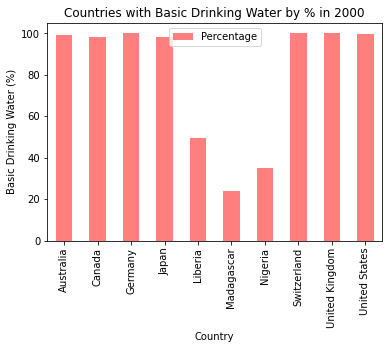

In [18]:
# Year 2000 bar chart of targeted countries' basic drinking services %
year_2000_bar = year_2000.plot.bar('Location', 'Percentage', color = 'red', alpha = 0.5)
    # alpha gives the shade of the color, ranging between 0-1

plt.title('Countries with Basic Drinking Water by % in 2000')
plt.xlabel("Country")
plt.ylabel("Basic Drinking Water (%)")

plt.savefig("My Project Images/2000 Countries with Basic Drinking Water.png", bbox_inches ="tight")

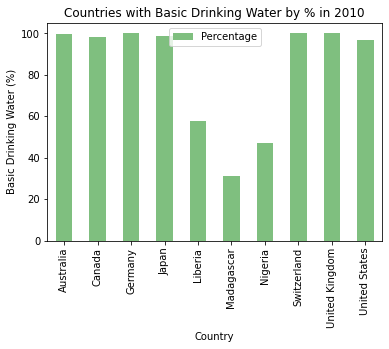

In [19]:
# Year 2010 bar chart of targeted countries' basic drinking services %
year_2010_bar = year_2010.plot.bar('Location', 'Percentage', color = 'green', alpha = 0.5)
    # alpha gives the shade of the color, ranging between 0-1

plt.title('Countries with Basic Drinking Water by % in 2010')
plt.xlabel("Country")
plt.ylabel("Basic Drinking Water (%)")

plt.savefig("My Project Images/2010 Countries with Basic Drinking Water.png", bbox_inches ="tight")

# use a for loop will be able to make the graphs and save them at once.

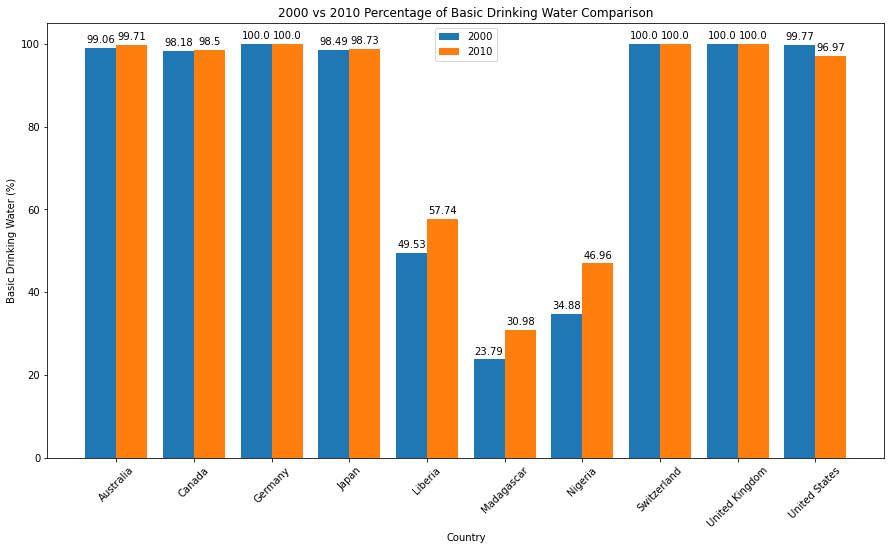

In [20]:
# create a chart combining 2000 and 2010 bar charts for easier comparison of the two years

labels = countries
y = year_2000.Percentage
z = year_2010.Percentage

x = np.arange(len(labels))  # the label locations, "np.arange()" gives evenly spaced values within a given interval(in this case, it's the length of the countries, meaning the number of countries)
width = 0.4  # the width of the bars

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot()  # fig, ax = plt.subplots() -- this code makes the chart size not changeable 


values_2000 = ax.bar(x - width/2, y, width, label='2000')
values_2010 = ax.bar(x + width/2, z, width, label='2010')

# Add labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Country')
ax.set_ylabel('Basic Drinking Water (%)')
ax.set_title('2000 vs 2010 Percentage of Basic Drinking Water Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 45)
ax.legend()

# Attach percentages above each bar in *rects*, displaying its height.
def autolabel(values):
    # "def" defines a function
    
    for value in values:
        height = value.get_height()
        ax.annotate('{}'.format(height),
                    xy=(value.get_x() + value.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset for values above bars
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(values_2000)
autolabel(values_2010)

plt.savefig("My Project Images/2000 vs 2010 Percentage of Basic Drinking Water Comparison.png", bbox_inches ="tight")
plt.show()

# Resource: 
# https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
# https://matplotlib.org/xkcd/examples/pylab_examples/barchart_demo.html

In [21]:
# An example of using "def".
def greet(person_name):   
# begin definition
  print(f"Hello, {person_name}, nice to see you!")
                      
# end definition

greet("Alex")    
#=> Hello, Alex, nice to see you!

# Source: https://www.codecademy.com/forum_questions/51747f041031da9c3900478e

Hello, Alex, nice to see you!


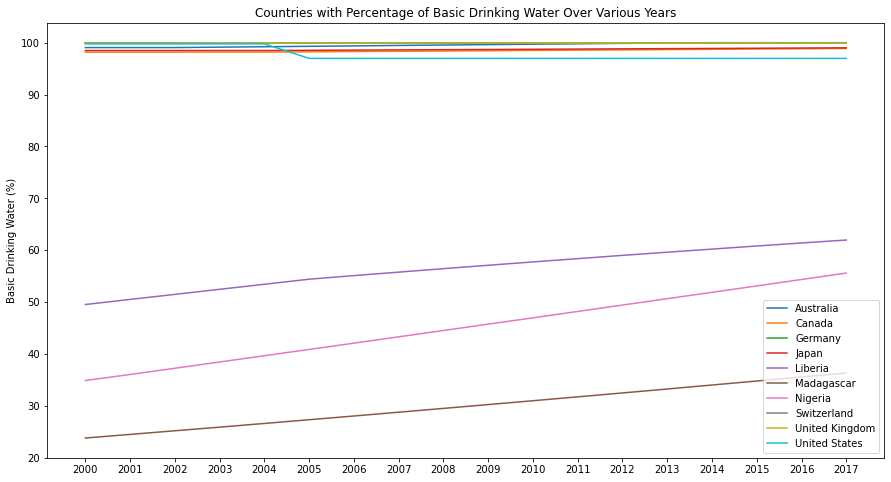

In [22]:
# get line chart to compare countries' drinking water over various years

plt.figure(figsize=(15,8)) 

for country in countries:
    df = target_countries_df[target_countries_df['Location']==country]
    plt.plot(df['Period'],df['Percentage'],label=country)

plt.title('Countries with Percentage of Basic Drinking Water Over Various Years')
plt.xticks(ticks=df.Period.values) # this is the only change made to remove decimals w/o the need to import Datetime
# plt.xlabel("Year")
plt.ylabel('Basic Drinking Water (%)')
plt.legend()

plt.savefig('My Project Images/Countries with Percentage of Basic Drinking Water Over Various Years.png', bbox_inches = 'tight')
plt.show() # plt.show()--needs to be after plt.savefig()

In [23]:
sani_df= sani_data.rename(columns={"Population using at least basic sanitation services (%)":"Percentage"})
sani_df.head()

,Location,Period,Area,Percentage
0,Afghanistan,2017,Total,43.42
1,Afghanistan,2017,Urban,62.26
2,Afghanistan,2017,Rural,37.05
3,Afghanistan,2016,Total,42.05
4,Afghanistan,2016,Urban,59.92


In [24]:
sani_df['Location'] = sani_df['Location'].replace({
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom', 
    'United States of America': 'United States'})


In [25]:
# sort dataframe by country for Population using at least basic sanitation services (%)
display(sani_df.sort_values(['Location'], ascending=True))

,Location,Period,Area,Percentage
0,Afghanistan,2017,Total,43.42
29,Afghanistan,2008,Rural,28.43
30,Afghanistan,2007,Total,30.41
31,Afghanistan,2007,Urban,40.18
32,Afghanistan,2007,Rural,27.48
...,...,...,...,...
9335,Zimbabwe,2010,Total,41.05
9336,Zimbabwe,2010,Urban,55.76
9337,Zimbabwe,2010,Rural,33.75
9326,Zimbabwe,2013,Total,38.94


In [26]:
len(sani_df["Location"].unique())

195

In [27]:
target_areas = pd.DataFrame(sani_df.query("Location == ['Switzerland', 'Canada', 'Japan', 'Germany', 'Australia', 'United Kingdom', 'United States', 'Liberia', 'Nigeria', 'Madagascar']"))

In [28]:
target_df = target_areas[target_areas["Area"] == 'Total']
areas = target_df['Location'].unique()
areas

array(['Australia', 'Canada', 'Germany', 'Japan', 'Liberia', 'Madagascar',
       'Nigeria', 'Switzerland', 'United Kingdom', 'United States'],
      dtype=object)

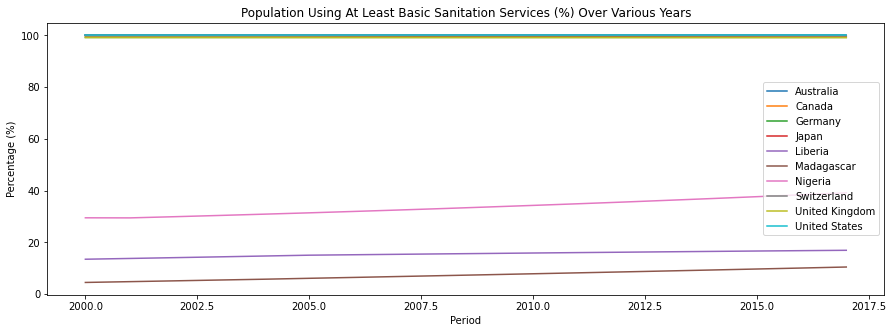

In [29]:
# Population using at least basic sanitation services (%)Over Various Years

plt.figure(figsize=(15,5)) 

for area in areas:
    df = target_df[target_df['Location']==area]
    plt.plot(df['Period'],df['Percentage'],label=area)
plt.title('Population Using At Least Basic Sanitation Services (%) Over Various Years')
plt.xlabel("Period")
plt.ylabel('Percentage (%)')
plt.legend()    

plt.savefig("My Project Images/ Population Using At Least Basic Sanitation Services (%) Over Various Years.png",bbox_inches ="tight")
plt.show()

In [30]:
# get data of years 2000 and 2010 for using Sani water
sani_year_2000 = pd.DataFrame(target_areas.query("Period == '2000'"))
sani_year_2010 = pd.DataFrame(target_areas.query("Period == '2010'"))


years = [sani_year_2000,sani_year_2010]

for year in years:
    display(year.sort_values(['Percentage'], ascending=True))

,Location,Period,Area,Percentage
4960,Madagascar,2000,Rural,2.73
4780,Liberia,2000,Rural,4.12
4958,Madagascar,2000,Total,4.55
4959,Madagascar,2000,Urban,9.43
4778,Liberia,2000,Total,13.52
4779,Liberia,2000,Urban,25.32
6163,Nigeria,2000,Rural,29.22
6161,Nigeria,2000,Total,29.52
6162,Nigeria,2000,Urban,30.06
3304,Germany,2000,Rural,98.99


,Location,Period,Area,Percentage
4930,Madagascar,2010,Rural,5.00
4750,Liberia,2010,Rural,5.08
4928,Madagascar,2010,Total,7.90
4929,Madagascar,2010,Urban,14.08
4748,Liberia,2010,Total,15.92
4749,Liberia,2010,Urban,27.75
6133,Nigeria,2010,Rural,30.10
6131,Nigeria,2010,Total,34.31
6132,Nigeria,2010,Urban,39.78
3274,Germany,2010,Rural,98.99


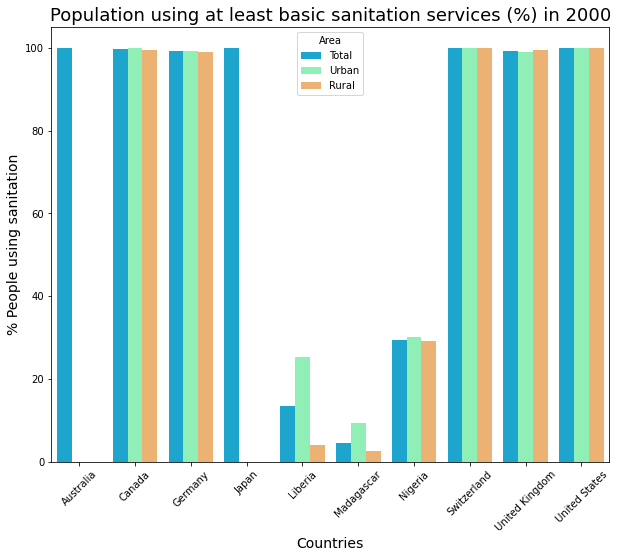

In [31]:
# Bar graph for Population using at least basic sanitation services (%) in 2000
plt.figure(figsize=(10, 8))
sns.barplot(x="Location", 
    y="Percentage",
    hue = "Area",
    data = sani_year_2000,
    ci=None,
    palette = ("rainbow"))

plt.ylabel("% People using sanitation", size=14)
plt.xlabel("Countries", size=14)
plt.xticks(rotation = 45)
plt.title("Population using at least basic sanitation services (%) in 2000", size=18)
plt.savefig("My Project Images/ 2000 Population using sanitation.png",bbox_inches ="tight")

plt.show()

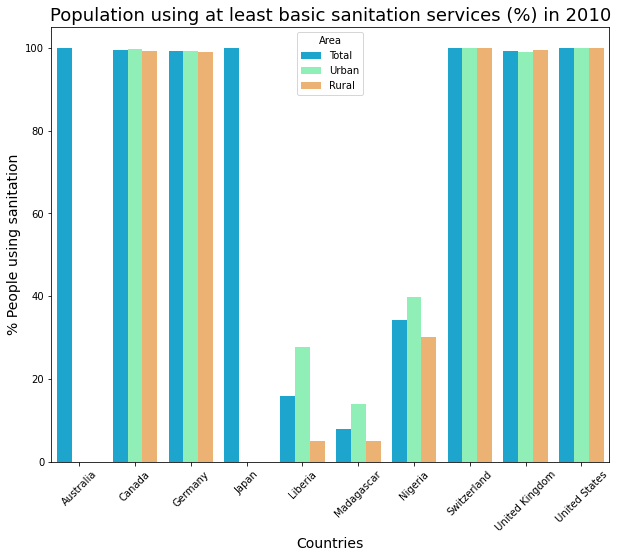

In [32]:
# Bar graph for Population using at least basic sanitation services (%) in 2010
plt.figure(figsize=(10, 8))
sns.barplot(x="Location", 
    y="Percentage",
    hue = "Area",
    data = sani_year_2010,
    ci=None,
    palette = ("rainbow"))

plt.ylabel("% People using sanitation", size=14)
plt.xlabel("Countries", size=14)
plt.xticks(rotation = 45)
plt.title("Population using at least basic sanitation services (%) in 2010", size=18)
plt.savefig("My Project Images/ 2010 Population using sanitation.png",bbox_inches ="tight")

plt.show()

In [33]:
# define dataframes for "Total" area for 2000 and 2010
year_2000_total = pd.DataFrame(sani_year_2000.query("Area == 'Total'"))
year_2010_total = pd.DataFrame(sani_year_2010.query("Area == 'Total'"))

# display dataframes for preview
display(year_2000_total, year_2010_total)

,Location,Period,Area,Percentage
411,Australia,2000,Total,99.99
1498,Canada,2000,Total,99.78
3302,Germany,2000,Total,99.22
4294,Japan,2000,Total,100.00
4778,Liberia,2000,Total,13.52
4958,Madagascar,2000,Total,4.55
6161,Nigeria,2000,Total,29.52
8137,Switzerland,2000,Total,99.90
8866,United Kingdom,2000,Total,99.13
8974,United States,2000,Total,99.97


,Location,Period,Area,Percentage
401,Australia,2010,Total,99.99
1468,Canada,2010,Total,99.56
3272,Germany,2010,Total,99.22
4284,Japan,2010,Total,99.95
4748,Liberia,2010,Total,15.92
4928,Madagascar,2010,Total,7.90
6131,Nigeria,2010,Total,34.31
8107,Switzerland,2010,Total,99.89
8836,United Kingdom,2010,Total,99.12
8944,United States,2010,Total,99.97


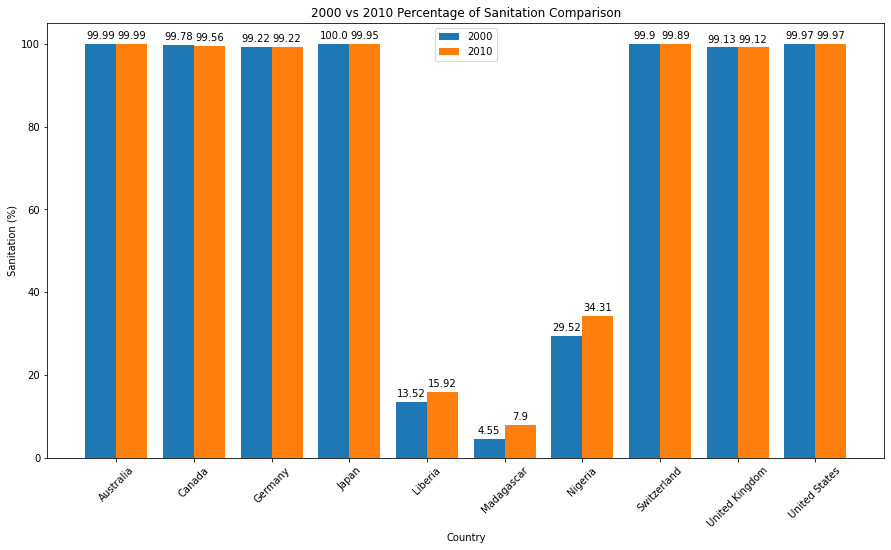

In [34]:
# create a bar chart to compare only the Total area for years 2000 and 2010

labels = countries
y = year_2000_total.Percentage
z = year_2010_total.Percentage

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot()  # fig, ax = plt.subplots() -- this code makes the chart size not changeable 

values_2000 = ax.bar(x - width/2, y, width, label='2000')
values_2010 = ax.bar(x + width/2, z, width, label='2010')

# Add labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Country')
ax.set_ylabel('Sanitation (%)')
ax.set_title('2000 vs 2010 Percentage of Sanitation Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 45)
ax.legend()

# Attach percentages above each bar in *rects*, displaying its height.
def autolabel(values):
    
    for value in values:
        height = value.get_height()
        ax.annotate('{}'.format(height),
                    xy=(value.get_x() + value.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(values_2000)
autolabel(values_2010)

plt.savefig("My Project Images/2000 vs 2010 Percentage of Sanitation Comparison.png", bbox_inches ="tight")
plt.show()

In [35]:
# Plot multipe bar chart in matplotlib
# https://stackoverflow.com/questions/14270391/python-matplotlib-multiple-bars
# Plot with seaborn
# https://datavizpyr.com/grouped-barplots-in-python-with-seaborn/